# Week One Final Project: Movie Revenue Prediction and Exploration

Where has week one gone! We have one more project for you to put a nice little bow on all of the hard work you've done so far. For this project, be persistent, be curious, and ask questions if you get stuck!

## The Project

You and your teammates will create one prediction model and *AT LEAST* three plots or charts. Everyone will present their model and their charts during the final session of the day.
* Model predictions will be ranked according to their r-squared values and we will crown a winner!
* Your plots should be driven by curiosity. Everyone will present at least one plot.

## Helper Functions

We've provided helper functions down below. If you need help remembering what they do, refer to the `airbnb_solution.ipynb` example.

In [1]:
# We'll use these packages
import pandas as pd
import numpy as np
import ast
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

pd.set_option('display.max_columns', 100)

# Read in the data!
hotel_data = pd.read_csv("hotel_bookings.csv")

In [13]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_numeric
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,1


In [12]:
hotel_data['hotel_numeric'] = hotel_data['hotel'].replace(['Resort Hotel','City Hotel',np.nan],[1,0,2])

C:\Users\chtva\AppData\Local\Temp\ipykernel_10056\1627521272.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hotel_data['hotel_numeric'] = hotel_data['hotel'].replace(['Resort Hotel','City Hotel',np.nan],[1,0,2])


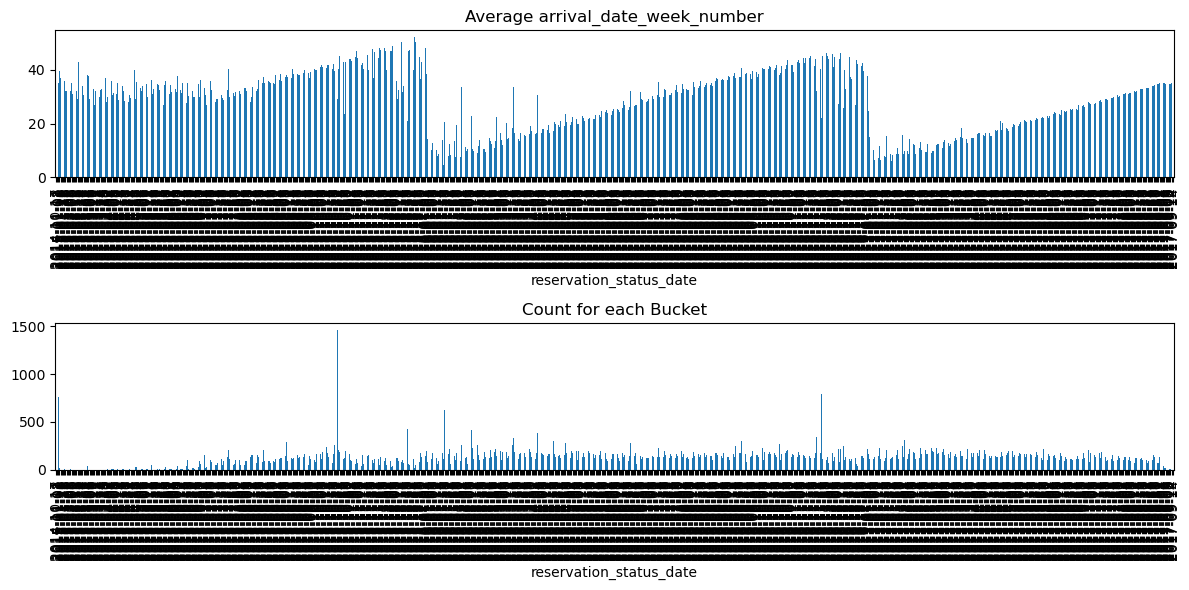

In [6]:
# Helper Function: Two Bar Chart Plots
groupby_variable = "reservation_status_date"
y_value = "arrival_date_week_number"

fig, axs = plt.subplots(2, 1, figsize=(12, 6))
hotel_data.groupby(groupby_variable)[y_value].mean().plot(kind="bar", ax=axs[0], title=f"Average {y_value}")
hotel_data.groupby(groupby_variable)[y_value].count().plot(kind="bar", ax=axs[1], title=f"Count for each Bucket")
fig.tight_layout()

<Axes: xlabel='reservation_status_date', ylabel='arrival_date_week_number'>

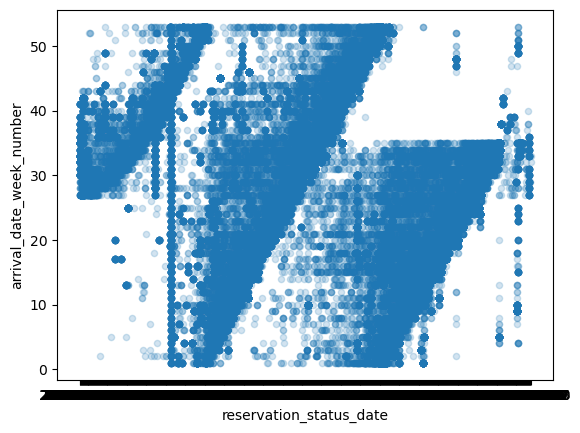

In [7]:
# Helper Function: Scatter Plotraing

x_value = "reservation_status_date"
y_value = "arrival_date_week_number"

hotel_data.plot(x=x_value, y=y_value, kind="scatter", alpha=0.2)

Training Data Statistics
mean_absolute_error:  0.42041474139325463
mean_squared_error 0.2100370293070299
R**2 0.0570100944037889

Validation Data Statistics
mean_absolute_error:  0.42193160811785707
mean_squared_error 0.2110358397964606
R**2 0.057090434470135065


C:\Users\chtva\AppData\Local\Temp\ipykernel_10056\1326392188.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f"predicted_{target}"] = model.predict(train_data[features])
C:\Users\chtva\AppData\Local\Temp\ipykernel_10056\1326392188.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data[f"predicted_{target}"] = model.predict(validation_data[features])


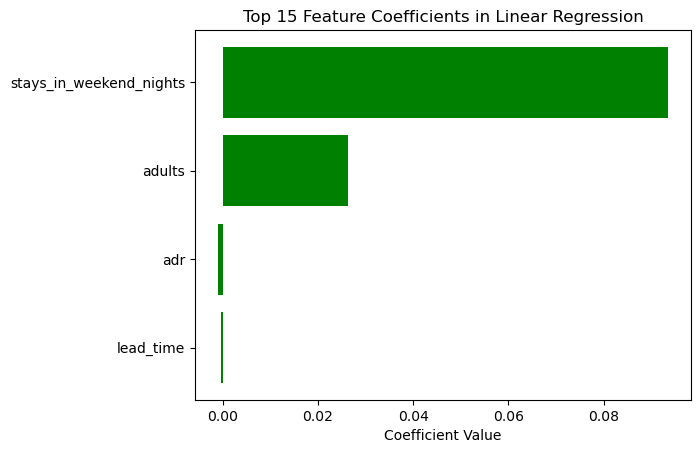

In [20]:
# Helper Function: Model Training
features = ["adults", "stays_in_weekend_nights", "lead_time", "adr"]

target = "hotel_numeric"  # LEAVE THIS ALONE
model_type = "linear regression"  # Options: "random forest" or "linear regression"
features_to_show = 15


if model_type == "random forest":
    model = RandomForestRegressor()
elif model_type == "linear regression":
    model = LinearRegression()

shuffled_data = hotel_data.sample(len(hotel_data))  # Shuffle our data
train_data = shuffled_data[:int(len(shuffled_data)*0.8)]
validation_data = shuffled_data[int(len(shuffled_data)*0.8):]

model.fit(train_data[features], train_data[target])

train_data[f"predicted_{target}"] = model.predict(train_data[features])
validation_data[f"predicted_{target}"] = model.predict(validation_data[features])

# How do we measure our success?
print("Training Data Statistics")
print("mean_absolute_error: ", mean_absolute_error(train_data[target], train_data[f"predicted_{target}"]))
print("mean_squared_error", mean_squared_error(train_data[target], train_data[f"predicted_{target}"]))
print("R**2", r2_score(train_data[target], train_data[f"predicted_{target}"]))
print("")

print("Validation Data Statistics")
print("mean_absolute_error: ", mean_absolute_error(validation_data[target], validation_data[f"predicted_{target}"]))
print("mean_squared_error", mean_squared_error(validation_data[target], validation_data[f"predicted_{target}"]))
print("R**2", r2_score(validation_data[target], validation_data[f"predicted_{target}"]))

if model_type == "random forest":
    importances = model.feature_importances_
    indices = np.argsort(importances)[-features_to_show:]  # sort top features

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Bar plot
    ax.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.title(f'Top {features_to_show} Feature Importances')
    plt.show()

if model_type == "linear regression":
    coefficients = model.coef_
    indices = np.argsort(np.abs(coefficients))[-features_to_show:]  # sort top features by magnitude

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Bar plot
    ax.barh(range(len(indices)), coefficients[indices], color='g', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Coefficient Value')
    plt.title(f'Top {features_to_show} Feature Coefficients in Linear Regression')
    plt.show()